In [1]:
from test_like import TestLike

In [6]:
info_txt = r"""
likelihood:
    test_like.TestLike: 
      python_path: .
theory:
    test_like.ACalculator: 
      python_path: .
"""
from cobaya.yaml import yaml_load
info = yaml_load(info_txt)


info["params"] = {
    "H0": {"prior": {"min": 0, "max": 100}, "ref": 10, "proposal": 0.001}}

info["sampler"] = {"mcmc":{"max_tries": 1000}}
#info["sampler"] = {"minimize":None}
#info['sampler']={'evaluate':None}
from cobaya.model import get_model
model = get_model(info)

point={'H0':30}
logposterior = model.logposterior(point)
print(logposterior)


[model] *WARNING* Ignored blocks/options: ['sampler']
[model] *WARNING* Ignored blocks/options: ['sampler']
LogPosterior(logpost=-348.5883548307788, logpriors=[-4.605170185988092], loglikes=array([-343.98318464]), derived=[])


In [7]:
from cobaya.run import run
updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {test_like.TestLike: 7370.0, test_like.ACalculator: 208000.0}
[model] Setting measured speeds (per sec): {test_like.TestLike: 7370.0, test_like.ACalculator: 208000.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: H0:10
[mcmc] Initial point: H0:10
[mcmc] Sampling!
[mcmc] Sampling!
[mcmc] Progress @ 2022-04-06 16:37:48 : 1 steps taken, and 0 accepted.
[mcmc] Progress @ 2022-04-06 16:37:48 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence t

[mcmc]  - Convergence of means: R-1 = 0.382865 after 544 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 720 samples accepted.
[mcmc] Learn + convergence test @ 720 samples accepted.
[mcmc]  - Acceptance rate: 0.103
[mcmc]  - Acceptance rate: 0.103
[mcmc]  - Convergence of means: R-1 = 0.228977 after 576 accepted steps
[mcmc]  - Convergence of means: R-1 = 0.228977 after 576 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 760 samples accepted.
[mcmc] Learn + convergence test @ 760 samples accepted.
[mcmc]  - Acceptance rate: 0.101
[mcmc]  - Acceptance rate: 0.101
[mcmc]  - Convergence of means: R-1 = 0.142900 after 608 accepted steps
[mcmc]  - Convergence of means: R-1 = 0.142900 after 608 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc]  - Updated c

[root] *WARNING* outlier fraction 0.12314814814814815 
[root] *WARNING* outlier fraction 0.12314814814814815 


(71.0, 75.0)

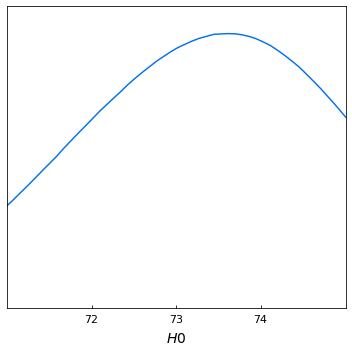

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["H0"], filled=True)
plt.xlim(71,75)
#gdplot = gdplt.get_subplot_plotter(width_inch=5)
#gdplot.plots_1d(gdsamples, ["r", "theta"], nx=2)